In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [2]:
# load data
df_2L_80_orig = pd.read_csv("2xL_80_OT_32bit_Wireless.csv")
df_2L_112_orig = pd.read_csv("2xL_112_OT_32bit_Wireless.csv")
df_2L_128_orig = pd.read_csv("2xL_128_OT_32bit_Wireless.csv")

df_2R_80_orig = pd.read_csv("2xR_80_OT_32bit_Wireless.csv")
df_2R_112_orig = pd.read_csv("2xR_112_OT_32bit_Wireless.csv")
df_2R_128_orig = pd.read_csv("2xR_128_OT_32bit_Wireless.csv")

df_list_orig = [df_2L_80_orig, df_2L_112_orig, df_2L_128_orig, df_2R_80_orig, df_2R_112_orig, df_2R_128_orig]

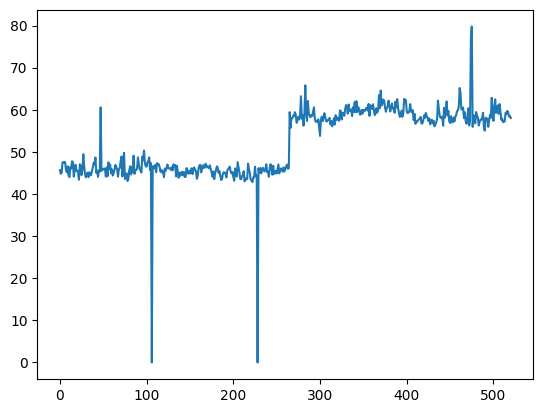

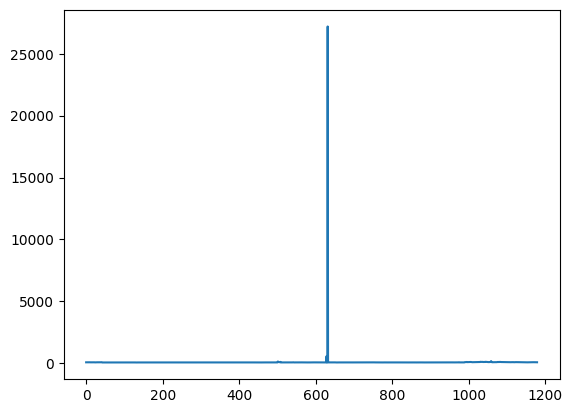

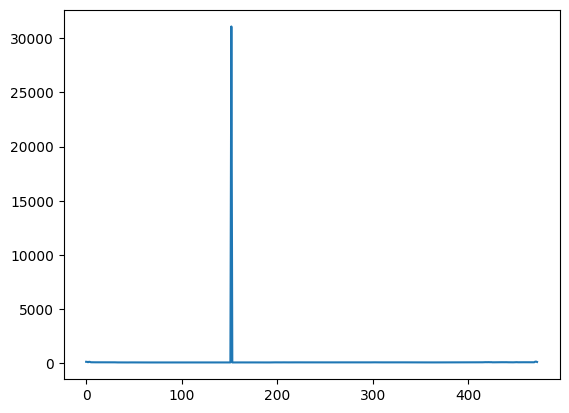

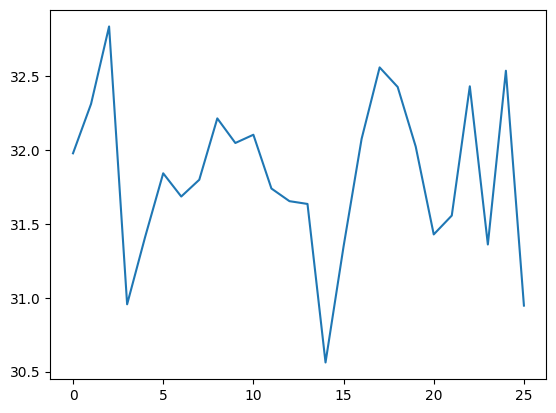

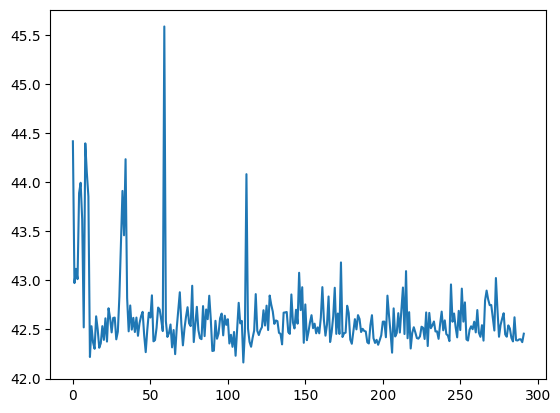

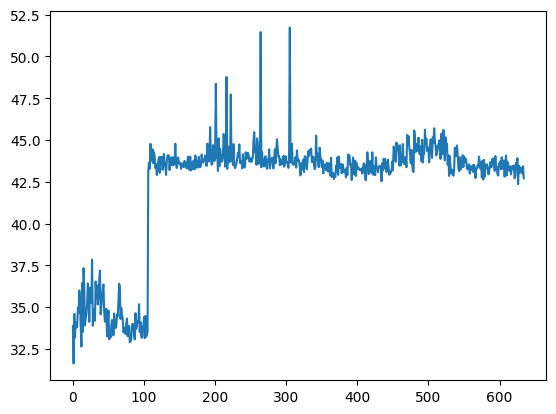

In [3]:
# inspect original data visually
for df_orig in df_list_orig:
    # change unit to sec
    plt.plot(df_orig['timings.total'] / 1000)
    plt.show()

In [5]:
# anything below 2 sec and above 300 seconds is an anomaly, drop it
df_list_wo_anom = []
for df_orig in df_list_orig:
    df_list_wo_anom.append(df_orig[(df_orig['timings.total'] > 2000) & (df_orig['timings.total'] < 300000)])

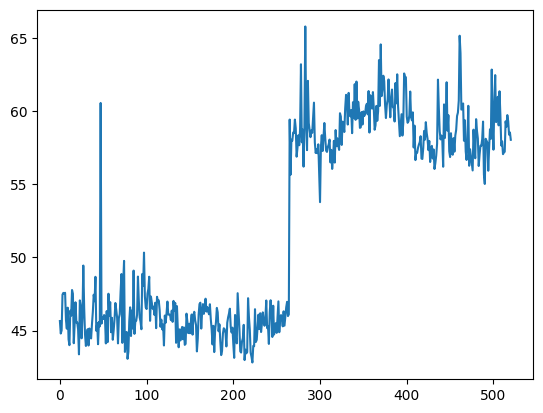

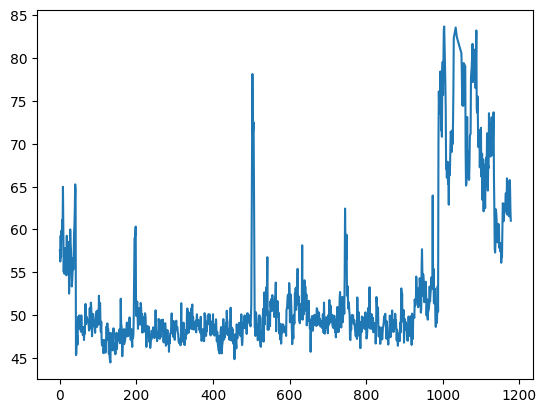

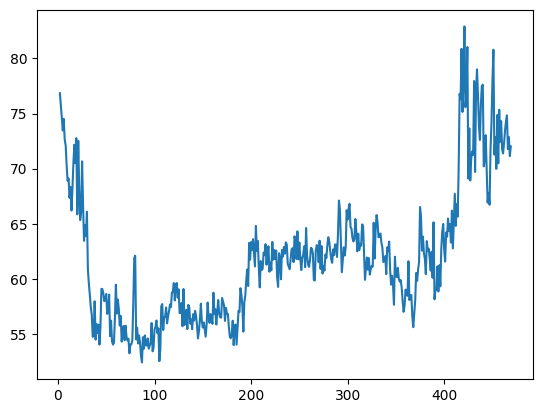

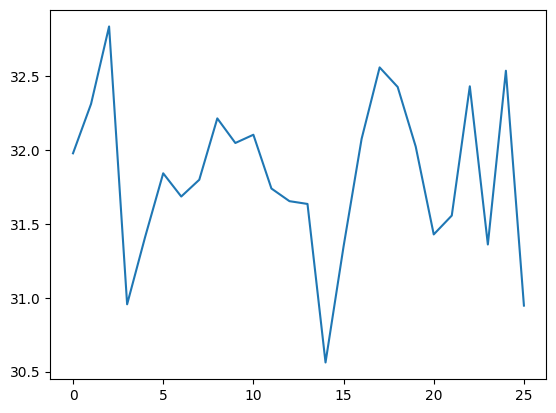

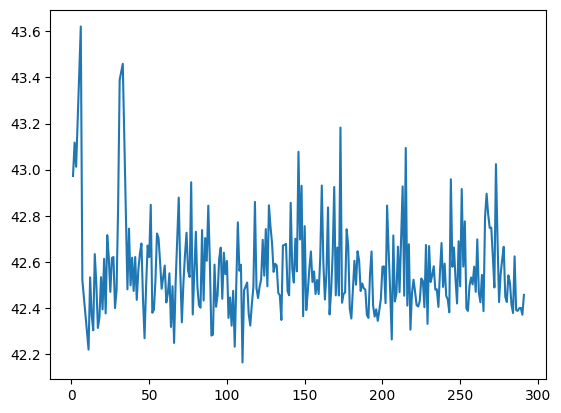

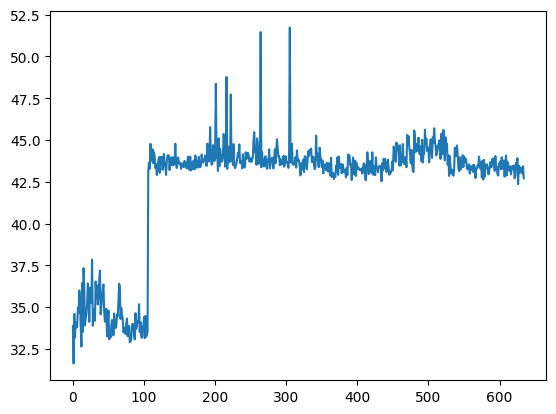

In [6]:
# get rid of values that are 3 standard deviations from mean
df_list = []
for df_wo_anom in df_list_wo_anom:
    df_list.append(df_wo_anom[(np.abs(stats.zscore(df_wo_anom['timings.total'])) < 3)])
for df in df_list:
    plt.plot(df['timings.total'] / 1000)
    plt.show()

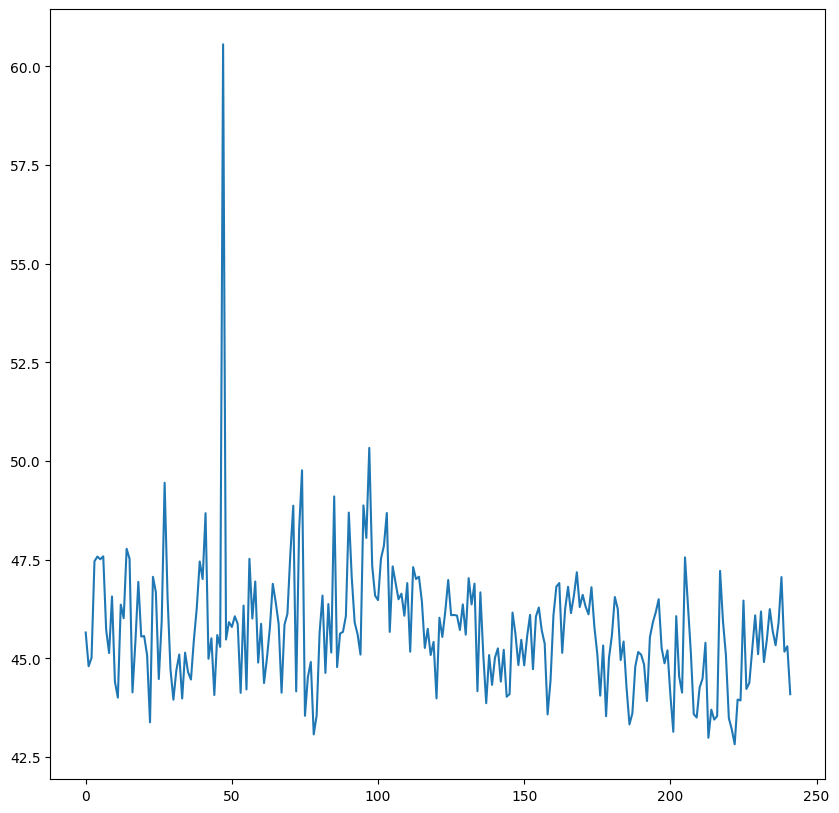

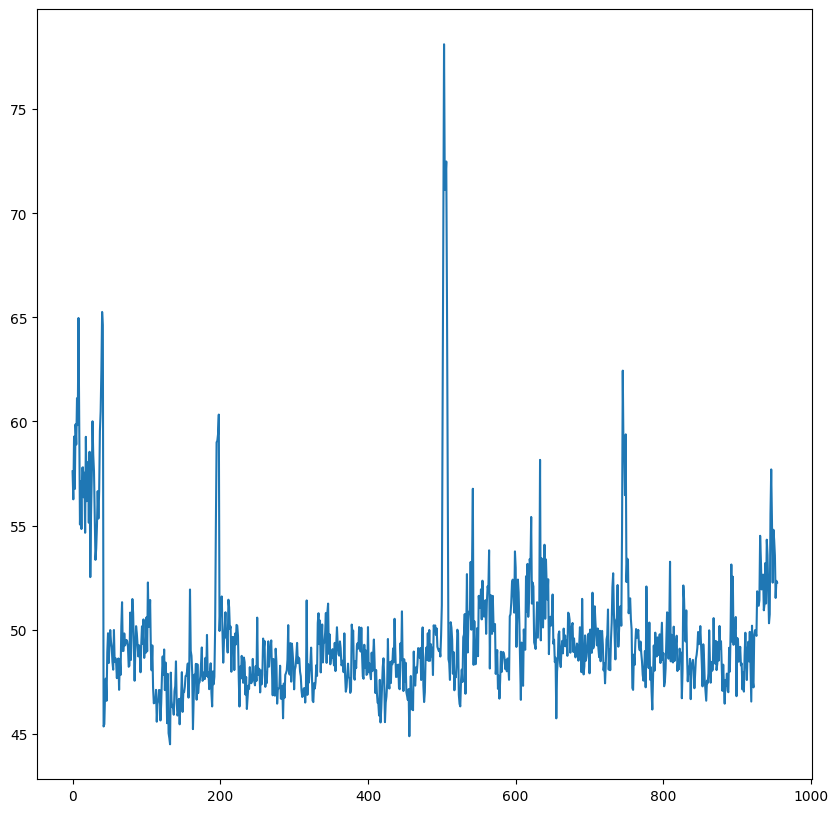

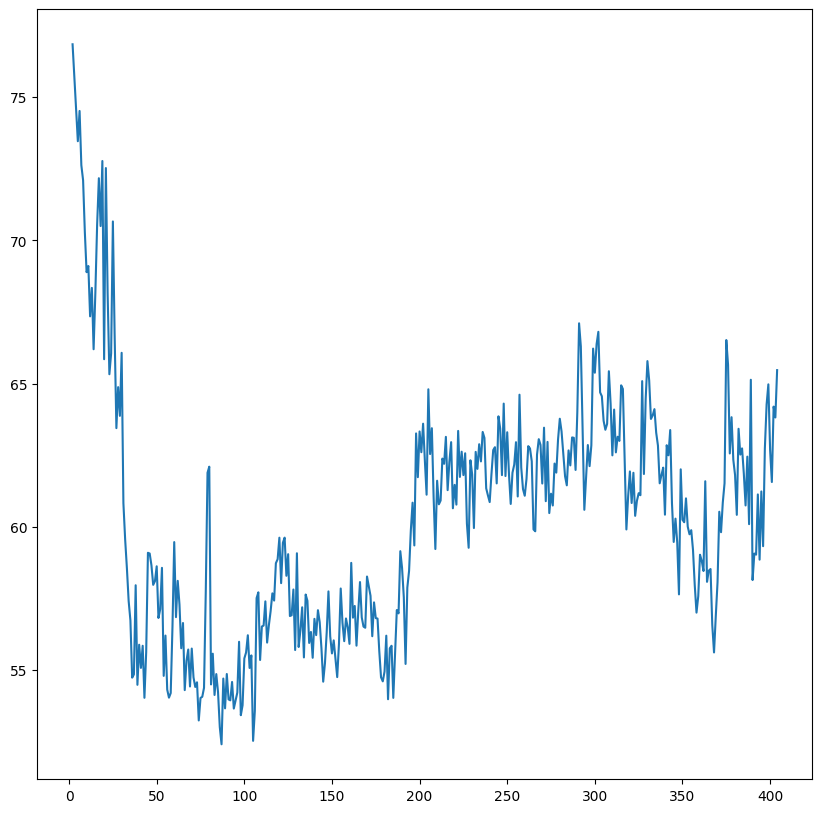

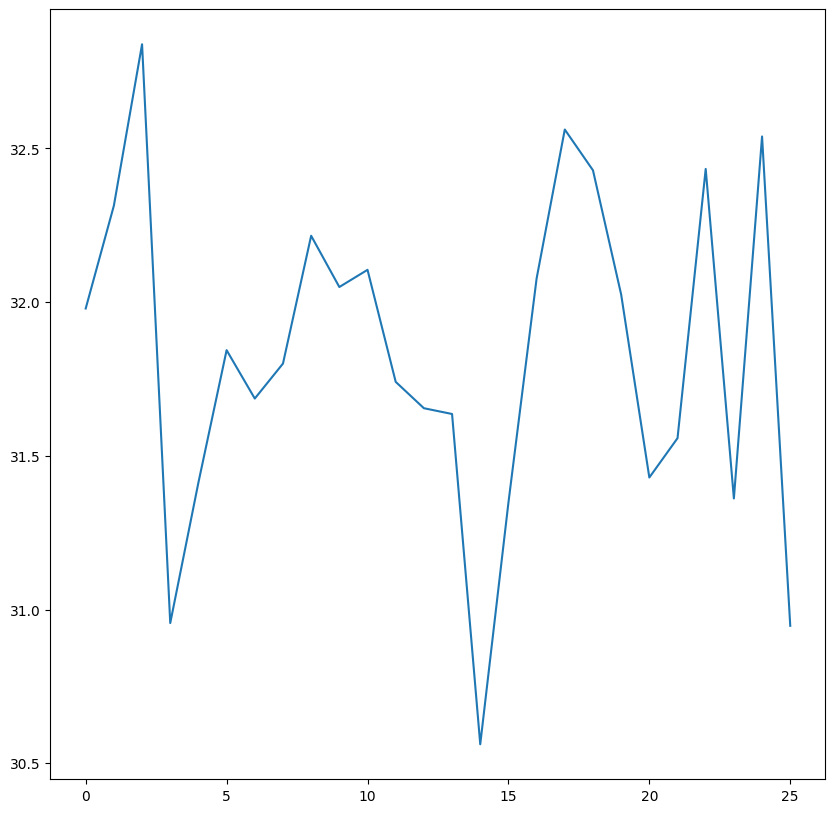

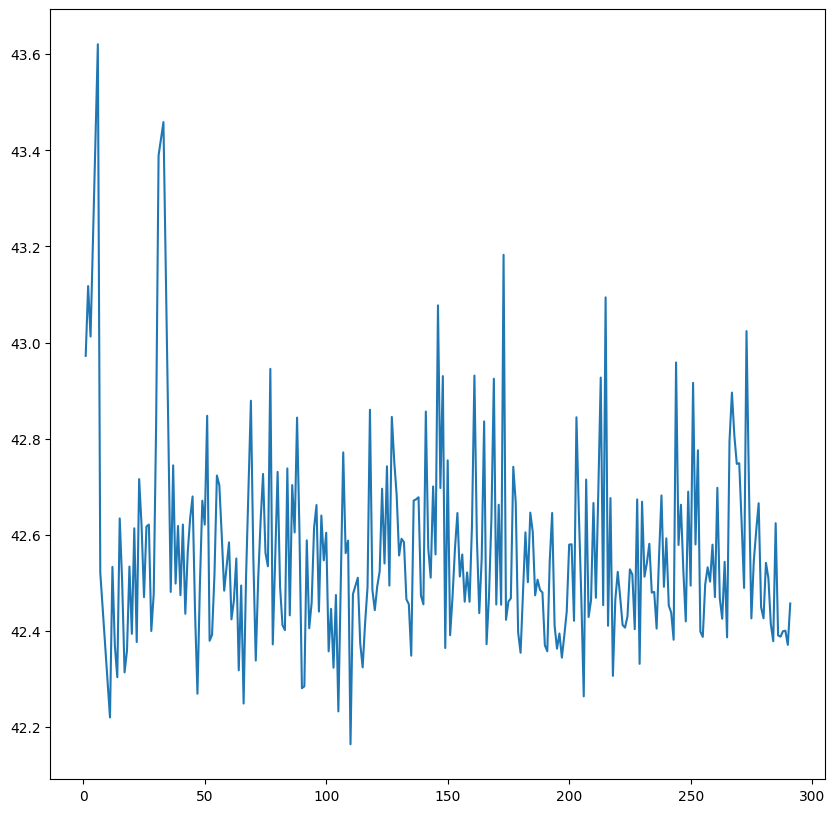

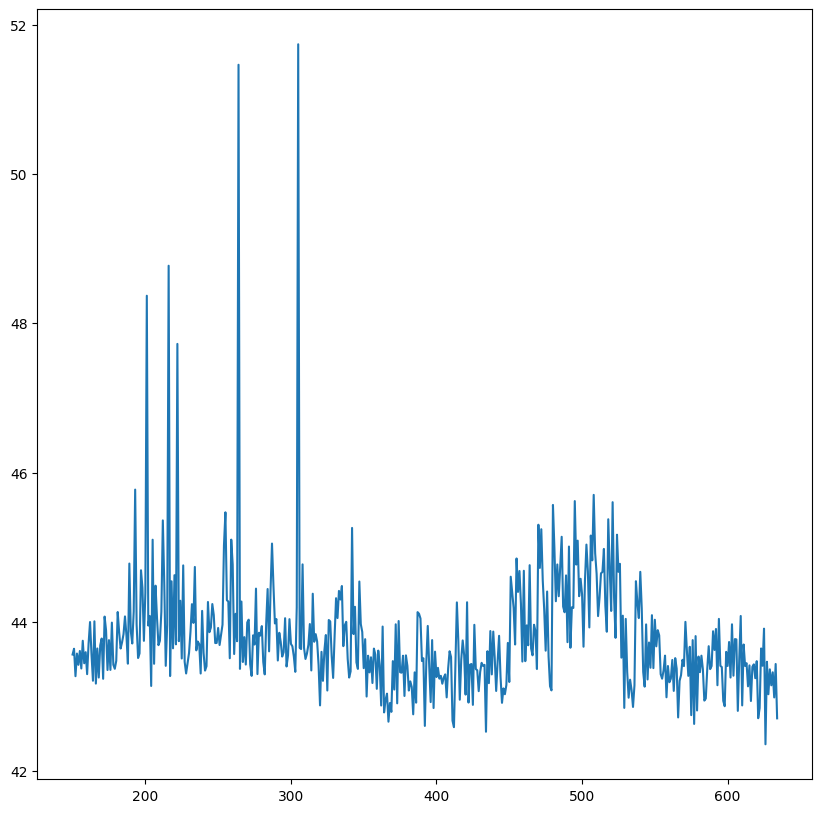

In [15]:
# correct for network congesting

df_list[0] = df_list[0].iloc[:240]
df_list[1] = df_list[1].iloc[:950]
df_list[2] = df_list[2].iloc[:400]
df_list[5] = df_list[5].iloc[150:]
for df in df_list:
    plt.plot(df['timings.total'] / 1000)
    plt.show()

### plot

Text(0.5, 1.0, 'Security level: speed comparison')

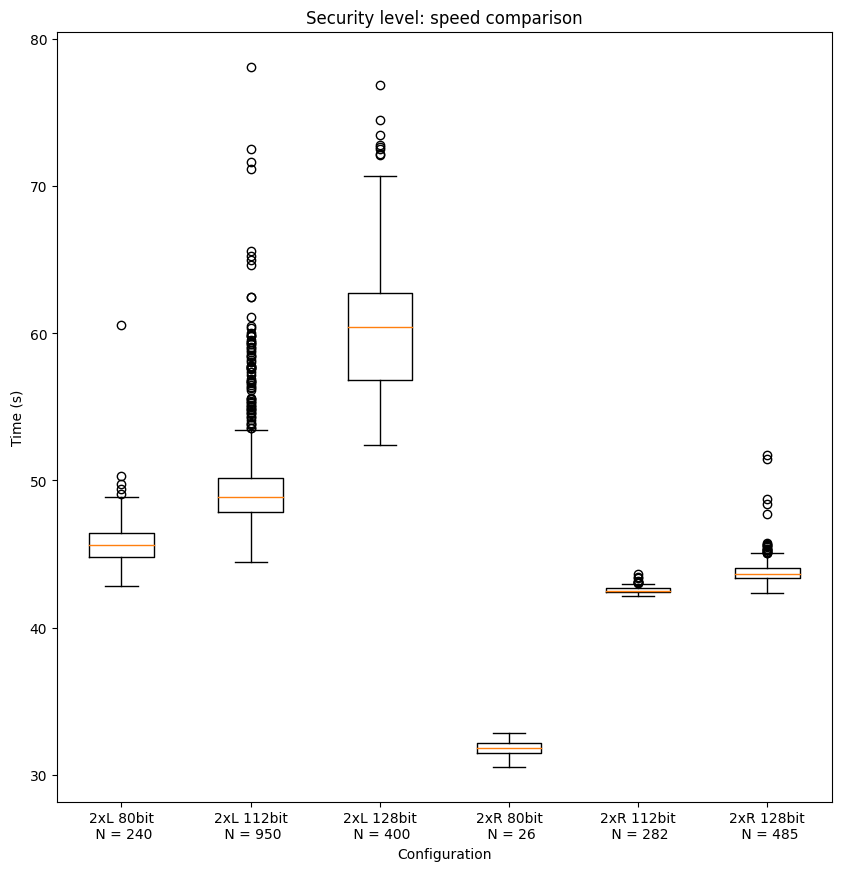

In [19]:
plt.rcParams['figure.figsize'] = [10, 10]  # default hor./vert. size of plots, in inches
labels = ["2xL 80bit", "2xL 112bit", "2xL 128bit", "2xR 80bit", "2xR 112bit", "2xR 128bit"]
for i in range(len(labels)):
    labels[i] += "\n N = " + str(len(df_list[i]))
ax = plt.boxplot([df['timings.total'] /1000 for df in df_list], labels=labels)
plt.xlabel("Configuration")
plt.ylabel("Time (s)")
plt.title("Security level: speed comparison")

### investigating slow network interface speeds on laptop3

In [33]:
df_laptop = df_list[2].copy()
df_rpi = df_list[5].copy()
rpi_means = [df_rpi['timings.online'].mean() / 1000, df_rpi['timings.setup'].mean() / 1000]
laptop_means = [df_laptop['timings.online'].mean() / 1000, df_laptop['timings.setup'].mean() / 1000]

In [34]:
print(df_rpi['timings.total'].mean() / 1000)
print(df_laptop['timings.total'].mean() / 1000)

43.798774129896906
60.1587610675


In [35]:
rpi_means

[33.79470605773196, 10.004054245360825]

In [36]:
laptop_means

[39.768981505000006, 20.389777202500003]

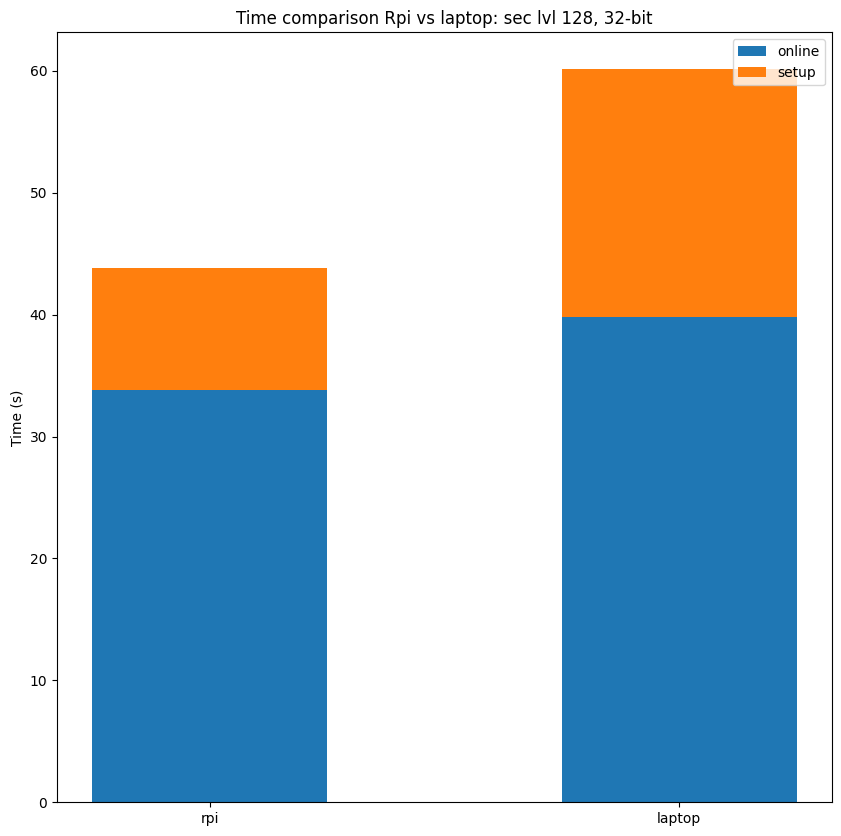

In [39]:
width = 0.5
fig, ax = plt.subplots()
bottom = np.zeros(2)
configs = ['rpi', 'laptop']
ax.bar(configs, [rpi_means[0], laptop_means[0]], width, label="online", bottom=bottom)
bottom += [rpi_means[0], laptop_means[0]]
ax.bar(configs, [rpi_means[1], laptop_means[1]], width, label="setup", bottom=bottom)


ax.set_title("Time comparison Rpi vs laptop: sec lvl 128, 32-bit")
ax.legend(loc="upper right")
ax.set_ylabel("Time (s)")

plt.show()